In [ ]:
import numpy as np
import pandas as pd
import pathlib
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_dir='/content/drive/MyDrive/skin disease'
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('/content/drive/MyDrive/skin disease')

In [ ]:
Acne= list(data_dir.glob('Acne/*')) #840
Eczema= list(data_dir.glob('Eczema/*')) #1677
Psoriasis= list(data_dir.glob('Psoriasis_and_LP/*')) #1405
Ringworm= list(data_dir.glob('Ringworm/*')) #1300

In [ ]:
# Contains the images path
df_images = {
'Acne':Acne,
'Eczema':Eczema,
'Psoriasis':Psoriasis,
'Ringworm':Ringworm,
}

# Contains numerical labels for the categories
df_labels = {
'Acne':0,
'Eczema':1,
'Psoriasis':2,
'Ringworm':3,
}

In [ ]:
import cv2 as cv
X=[]
y=[]
for label, images in df_images.items():
    for image in images:
        img=cv.imread(str(image))
        img=cv.resize(img,(224,224))
        img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
        X.append(img)
        y.append(df_labels[label])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import ResNet50, VGG16, InceptionV3, EfficientNetB0
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model

def train_and_compare_models(X_train, X_test, y_train, y_test):
    # Split the dataset into training and testing sets
    
    # Load the pre-trained models
    resnet_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    vgg16_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    inceptionv3_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    efficientnet_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    
    # Add new classification layers to the pre-trained models
    resnet_x = Flatten()(resnet_model.output)
    resnet_output = Dense(4, activation='softmax')(resnet_x)
    resnet_model = Model(inputs=resnet_model.input, outputs=resnet_output)
    
    vgg16_x = Flatten()(vgg16_model.output)
    vgg16_output = Dense(4, activation='softmax')(vgg16_x)
    vgg16_model = Model(inputs=vgg16_model.input, outputs=vgg16_output)
    
    inceptionv3_x = Flatten()(inceptionv3_model.output)
    inceptionv3_output = Dense(4, activation='softmax')(inceptionv3_x)
    inceptionv3_model = Model(inputs=inceptionv3_model.input, outputs=inceptionv3_output)
    
    efficientnet_x = Flatten()(efficientnet_model.output)
    efficientnet_output = Dense(4, activation='softmax')(efficientnet_x)
    efficientnet_model = Model(inputs=efficientnet_model.input, outputs=efficientnet_output)
    
    # Compile the models
    resnet_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    vgg16_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    inceptionv3_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    efficientnet_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # Train the models
    resnet_history = resnet_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)
    vgg16_history = vgg16_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)
    inceptionv3_history = inceptionv3_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)
    efficientnet_history = efficientnet_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)
    
    # Compare the results
    results = pd.DataFrame({
        'Model': ['ResNet50', 'VGG16', 'InceptionV3','EfficientNetB0'],
        'Train Accuracy': [np.max(resnet_history.history['accuracy']), np.max(vgg16_history.history['accuracy']), np.max(inceptionv3_history.history['accuracy']),np.max(efficientnet_history.history['accuracy'])],
        'Test Accuracy': [np.max(resnet_history.history['val_accuracy']), np.max(vgg16_history.history['val_accuracy']), np.max(inceptionv3_history.history['val_accuracy']), np.max(efficientnet_history.history['val_accuracy'])]
    })
    
    return results


In [ ]:
train_and_compare_models(X_train, X_test, y_train, y_test)

Epoch 1/10
131/131 [==============================] - 101s 367ms/step - loss: 3.5398 - accuracy: 0.3467 - val_loss: 2806.7576 - val_accuracy: 0.3043
Epoch 2/10
131/131 [==============================] - 45s 342ms/step - loss: 2.0483 - accuracy: 0.3799 - val_loss: 211.7421 - val_accuracy: 0.3923
Epoch 3/10
131/131 [==============================] - 45s 341ms/step - loss: 1.7028 - accuracy: 0.3996 - val_loss: 1.4515 - val_accuracy: 0.4010
Epoch 4/10
131/131 [==============================] - 45s 341ms/step - loss: 1.6063 - accuracy: 0.4012 - val_loss: 201.0265 - val_accuracy: 0.2852
Epoch 5/10
131/131 [==============================] - 45s 341ms/step - loss: 1.6735 - accuracy: 0.4082 - val_loss: 1.4418 - val_accuracy: 0.3990
Epoch 6/10
131/131 [==============================] - 45s 341ms/step - loss: 1.6621 - accuracy: 0.4233 - val_loss: 6.0671 - val_accuracy: 0.3330
Epoch 7/10
131/131 [==============================] - 45s 341ms/step - loss: 1.8219 - accuracy: 0.4235 - val_loss: 58.2555

,Model,Train Accuracy,Test Accuracy
0,ResNet50,0.461575,0.411483
1,VGG16,0.366531,0.395215
2,InceptionV3,0.391908,0.382775
3,EfficientNetB0,0.888437,0.667943


In [ ]:
efficientnet_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [ ]:
efficientnet_x = Flatten()(efficientnet_model.output)
efficientnet_output = Dense(4, activation='softmax')(efficientnet_x)
efficientnet_model = Model(inputs=efficientnet_model.input, outputs=efficientnet_output)

In [ ]:
efficientnet_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='accuracy', patience=3)

In [ ]:
efficientnet_history = efficientnet_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=26, batch_size=32)

Epoch 1/26
131/131 [==============================] - 35s 264ms/step - loss: 0.2962 - accuracy: 0.9638 - val_loss: 6.7513 - val_accuracy: 0.6440
Epoch 2/26
131/131 [==============================] - 35s 264ms/step - loss: 0.3490 - accuracy: 0.9591 - val_loss: 6.9096 - val_accuracy: 0.6632
Epoch 3/26
131/131 [==============================] - 34s 263ms/step - loss: 0.4946 - accuracy: 0.9516 - val_loss: 7.0032 - val_accuracy: 0.6727
Epoch 4/26
131/131 [==============================] - 34s 263ms/step - loss: 0.4385 - accuracy: 0.9509 - val_loss: 6.9085 - val_accuracy: 0.6775
Epoch 5/26
131/131 [==============================] - 34s 263ms/step - loss: 0.3072 - accuracy: 0.9667 - val_loss: 6.1100 - val_accuracy: 0.6737
Epoch 6/26
131/131 [==============================] - 35s 269ms/step - loss: 0.3222 - accuracy: 0.9658 - val_loss: 6.2641 - val_accuracy: 0.6612
Epoch 7/26
131/131 [==============================] - 34s 263ms/step - loss: 0.2871 - accuracy: 0.9708 - val_loss: 6.0811 - val_ac

In [ ]:
efficientnet_model.summary()

Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_4 (Rescaling)        (None, 224, 224, 3)  0           ['input_9[0][0]']                
                                                                                                  
 normalization_2 (Normalization  (None, 224, 224, 3)  7          ['rescaling_4[0][0]']            
 )                                                                                                
                                                                                            

In [ ]:
from sklearn.metrics import accuracy_score
y_pred=efficientnet_model.predict(X_test).argmax(axis=1)
accuracy_score(y_test,y_pred)

33/33 [==============================] - 2s 55ms/step


0.6775119617224881

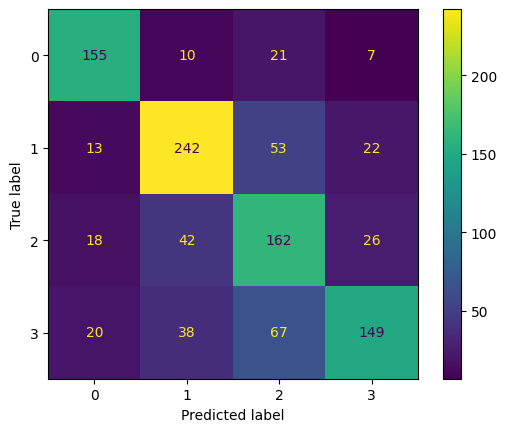

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot()
plt.show()

In [ ]:
import pickle


with open('efficientnet_model.pkl', 'wb') as f:
    pickle.dump(efficientnet_model, f)

In [ ]:
import pkg_resources
pkg_resources.require("keras==2.9.0")
import keras

VersionConflict: ignored

In [ ]:
pip install keras==2.9.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 13.2 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.12.0 requires keras<2.13,>=2.12.0, but you have keras 2.9.0 which is incompatible.


In [ ]:
efficientnet_model.save('efficientnet_model.h5')

TypeError: ignored